# Naive Bayes Classification

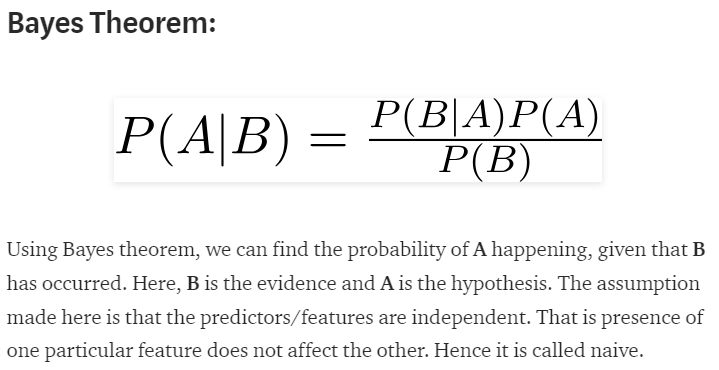

Key Points:
--
>__1. NB gives better result in multi class problems.__

And

>__2. NB gives better results when there is least colinearity among independent features.__

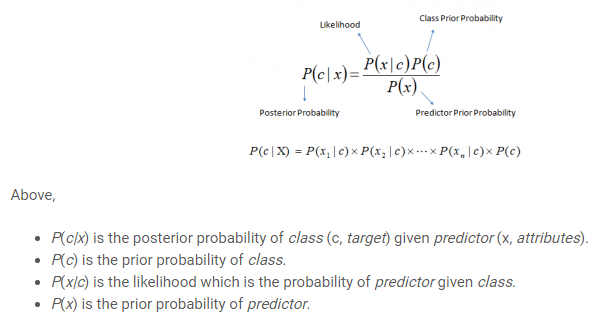

# How Naive Bayes algorithm works?

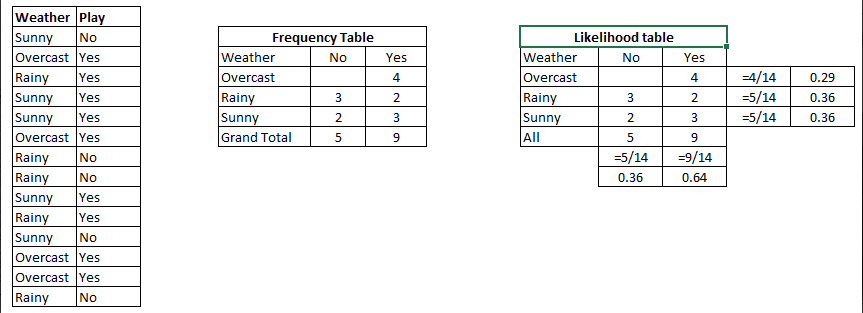

# A basic model using Naive Bayes in Python

In [1]:
# scikit learn (python library) will help here to build a Naive Bayes model 
# in Python.  There are three types of Naive Bayes model 
# under scikit learn library:

# 1> Gaussian : Used in classification and assumes that features 
#               follow a normal distribution.
# 2> Multinomial (http://mathworld.wolfram.com/MultinomialDistribution.html)
# 3> Bernoulli (http://mathworld.wolfram.com/BernoulliDistribution.html)

# Below is the example of Gaussian model.

# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

# assigning predictor and target variables
x = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], 
             [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
print(x,"\n\n",x.shape)
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
print("\n",Y,"\n\n",Y.shape)

[[-3  7]
 [ 1  5]
 [ 1  2]
 [-2  0]
 [ 2  3]
 [-4  0]
 [-1  1]
 [ 1  1]
 [-2  2]
 [ 2  7]
 [-4  1]
 [-2  7]] 

 (12, 2)

 [3 3 3 3 4 3 3 4 3 4 4 4] 

 (12,)


In [2]:
# type your code. Comments shouldguide you.
# Create a Gaussian Classifier
model=GaussianNB()

# Train the model using the training sets 
model.fit(x,Y)

# Predict Output 
predicted=model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


# Where is Naive Bayes Classifier used ?

>1 Real time Prediction 

>2 Text classification / Spam Filtering 

>3 Recommendation System 

# What are the Pros and Cons of Naive Bayes?

Pros:
-------
1> It is easy and fast to predict class of test data set. It also performs well in multi class prediction. 

2> When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

3> It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption). 

Cons:
--------
1> If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction(thus it becomes an outlier. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing(normalizing) techniques is called Laplace estimation.

2> On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_probability are not to be taken too seriously.

3> Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

Lets analyze the titanic dataset to predict whether a person Survived or not.
--

In [3]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
# read the train and test dataset
train_data = pd.read_csv("./datasets_n_images/datasets_module_4/train-data.csv")
test_data = pd.read_csv('./datasets_n_images/datasets_module_4/test-data.csv')

In [5]:
print(train_data.head())
print("------------------------")
print(test_data.head())

   Survived        Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  28.500000   7.2292         0         0         1           0   
1         1  27.000000  10.5000         0         1         0           1   
2         1  29.699118  16.1000         0         0         1           1   
3         0  29.699118   0.0000         1         0         0           0   
4         0  17.000000   8.6625         0         0         1           0   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        1        0  ...        1        0        0        0   
1         0        1        0  ...        1        0        0        0   
2         0        0        1  ...        1        0        0        0   
3         1        1        0  ...        1        0        0        0   
4         1        1        0  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0      

In [6]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)


In [7]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

In [8]:
print("After dropping 'Survived', train_x=\n:",train_x.head())
print("------------------------")
print("After picking 'Survived', train_y=\n:",train_y.head())

After dropping 'Survived', train_x=
:          Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  28.500000   7.2292         0         0         1           0         1   
1  27.000000  10.5000         0         1         0           1         0   
2  29.699118  16.1000         0         0         1           1         0   
3  29.699118   0.0000         1         0         0           0         1   
4  17.000000   8.6625         0         0         1           0         1   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0        1        0        0  ...        1        0        0        0   
1        1        0        0  ...        1        0        0        0   
2        0        1        0  ...        1        0        0        0   
3        1        0        0  ...        1        0        0        0   
4        1        0        0  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embark

In [9]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

In [10]:
print("After dropping 'Survived', test_x=\n:",test_x.head())
print("------------------------")
print("After picking 'Survived', test_y=\n:",test_y.head())

After dropping 'Survived', test_x=
:     Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  35.0    7.1250         0         0         1           0         1   
1  20.0    7.0500         0         0         1           0         1   
2  26.0    7.8958         0         0         1           0         1   
3  58.0  146.5208         1         0         0           1         0   
4  35.0   83.4750         1         0         0           1         0   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0        1        0        0  ...        1        0        0        0   
1        1        0        0  ...        1        0        0        0   
2        1        0        0  ...        1        0        0        0   
3        1        0        0  ...        1        0        0        0   
4        0        1        0  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        

In [11]:
model = GaussianNB()

In [12]:
# fit the model with the training data
model.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1

In [14]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.44803370786516855


In [15]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.35195530726256985


4 Applications of Naive Bayes Algorithms
--
>1. Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

>2. Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.

>3. Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)

>4. Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not